Note: you may need to restart the kernel to use updated packages.


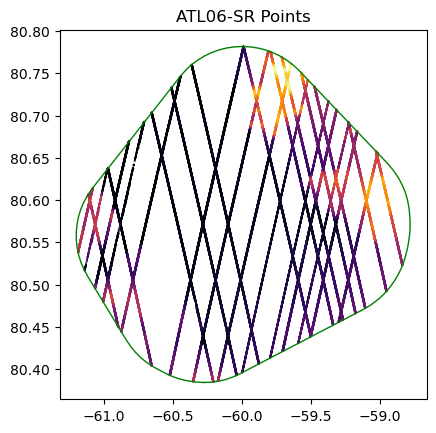

,h_li_sigma,h_li,rgt,w_surface_window_final,y_atc,sigma_geo_h,cycle,spot,seg_azimuth,atl06_quality_summary,...,segment_id,bsnow_conf,dh_fit_dx,h_robust_sprd,tide_ocean,x_atc,n_fit_photons,r_eff,gt,geometry
time,,,,,,,,,,,,,,,,,,,,,
2018-10-14 08:21:08.556751872,0.052340,692.260132,240,3.000000,-3412.326172,0.400247,1,2,-166.951233,0,...,551550,3,0.021537,0.285903,NaN,1.104866e+07,154,1.379212,50,POINT (-59.52427 80.7425)
2018-10-14 08:21:08.559567616,0.036530,692.400208,240,3.000000,-3412.319580,0.445554,1,2,-166.951462,0,...,551551,3,-0.006478,0.351057,NaN,1.104868e+07,149,1.304124,50,POINT (-59.52452 80.74233)
2018-10-14 08:21:08.562384128,0.039904,691.942810,240,3.000000,-3412.311768,0.510670,1,2,-166.951691,0,...,551552,3,-0.036560,0.372822,NaN,1.104870e+07,151,1.294816,50,POINT (-59.52476 80.74215)
2018-10-14 08:21:08.565201408,0.053819,690.944580,240,3.000000,-3412.305664,0.575490,1,2,-166.951904,0,...,551553,3,-0.062635,0.402903,NaN,1.104872e+07,166,1.452745,50,POINT (-59.52501 80.74198)
2018-10-14 08:21:08.568019968,0.055853,689.534302,240,3.000000,-3412.300049,0.634411,1,2,-166.952133,0,...,551554,3,-0.082030,0.480202,NaN,1.104874e+07,160,1.364545,50,POINT (-59.52526 80.7418)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 16:27:49.302723072,0.022177,675.746582,963,3.065539,2398.161621,0.613019,1,5,-13.145885,0,...,450486,-2,-0.117860,0.327740,NaN,9.026879e+06,615,1.553286,20,POINT (-59.70825 80.76816)
2018-11-30 16:27:49.305538304,0.021110,673.436401,963,3.000202,2398.208008,0.594356,1,5,-13.146111,0,...,450487,-2,-0.115246,0.311808,NaN,9.026899e+06,592,1.492831,20,POINT (-59.70851 80.76833)
2018-11-30 16:27:49.308352512,0.021663,671.122559,963,3.000000,2398.248779,0.589351,1,5,-13.146338,0,...,450488,-2,-0.114757,0.314909,NaN,9.026919e+06,605,1.536084,20,POINT (-59.70877 80.76851)


In [21]:
# Install the SlideRule package
%pip install --quiet "sliderule>=4.6"

# Import necessary libraries
import sliderule
from sliderule import icesat2
import matplotlib.pyplot as plt

# Initialize SlideRule client with the server address
sliderule.init("slideruleearth.io")

def access_atl06(geojson_path, start_date, end_date):
    """
    Access ATL06 data using SlideRule for a specified region and time period.

    Parameters:
    geojson_path (str): Path to the GeoJSON file defining the area of interest.
    start_date (str): Start date for the data query in 'YYYY-MM-DD' format.
    end_date (str): End date for the data query in 'YYYY-MM-DD' format.

    Returns:
    gdf (GeoDataFrame): GeoDataFrame containing the ATL06 data.
    """
    
    # Convert the GeoJSON file to a region dictionary
    region = sliderule.toregion(geojson_path)
    
    # Define parameters for the ATL06 data request
    parms = {
        "poly": region['poly'],  # Polygon defining the area of interest
        "srt": icesat2.SRT_LAND,  # Surface type (land in this case)
        "len": 20.0,              # Segment length in meters
        "res": 100.0,             # Resolution in meters
        "t0": f"{start_date}T00:00:00Z",  # Start time in ISO format
        "t1": f"{end_date}T00:00:00Z"     # End time in ISO format
    }

    # Request ATL06 data using the specified parameters
    gdf = icesat2.atl06sp(parms)
    
    # Extract longitude and latitude from the region polygon for plotting
    region_lon = [e["lon"] for e in region["poly"]]
    region_lat = [e["lat"] for e in region["poly"]]
    
    # Plot the ATL06 data points and the region of interest
    f, ax = plt.subplots()
    ax.set_title("ATL06-SR Points")
    ax.set_aspect('equal')
    gdf.plot(ax=ax, column='h_li', cmap='inferno', s=0.1)  # Plot data points
    ax.plot(region_lon, region_lat, linewidth=1, color='g')  # Plot region boundary
    plt.show()

    # Return the GeoDataFrame containing the ATL06 data
    return gdf

